## TV, halftime shows et the Big Game
<p>Que vous aimiez ou non le football américain, le Super Bowl est un spectacle. Il y a un petit quelque chose pour tout le monde à la fête du Super Bowl. Drame, retours, et controverses pour les fans de sports. Les annonces publicitaires ridiculement chères, certaines hilarantes, d'autres déchirantes, provocantes et étranges. Les spectacles des mi-temps avec les plus grands musiciens du monde, parfois <a href="https://youtu.be/ZD1QrIe--_Y?t=14">accompagnés de tigres mécaniques géants</a> ou <a href="https://youtu.be/mjrdywp5nyE?t=62">sautant du toit du stade</a>. C'est un spectacle. Et dans ce notebook, nous allons découvrir comment certains des éléments de ce spectacle interagissent les uns avec les autres. Après avoir exploré et nettoyé nos données, nous allons répondre aux questions suivantes:</p>
<ul>
<li>Quels sont les résultats les plus extrêmes?</li>
<li>Comment le jeu affecte-t-il les téléspectateurs?</li>
<li>Comment les téléspectateurs, les audiences et les coûts publicitaires ont-ils évolué?</li>
<li>Quels sont les musiciens les plus prolifiques en terme de performances de spectacle à la mi-temps?</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_684/img/left_shark.jpg" alt="Left Shark Steals The Show">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Left Shark Steals The Show</a>. Performance de Katy Perry à la mi-temps du Super Bowl XLIX. Photo de Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>
<p>Le jeu de données que nous utiliserons a été <a href="https://en.wikipedia.org/wiki/Web_scraping">scrapé</a> de Wikipedia. Il est composé de trois fichiers CSV, un avec <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">les données des parties</a>, un avec <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">les données de la télévisions</a>, et un avec <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">les données des musiciens à la mi-temps</a> pour les 52 Super Bowls jusqu'en 2018. Allons jeter un coup d'oeil, en utilisant <code>display()</code> au lieu de <code>print()</code> car sa sortie est beaucoup plus jolie dans Jupyter Notebooks.</p>

In [2]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## Les problèmes des jeux de données
<p>Pour les données des parties du Super Bowl, nous pouvons voir que le jeu de données apparaît entier, à l'exception des valeurs manquantes dans les colonnes des quarterbacks remplaçants(<code>qb_winner_2</code> and <code>qb_loser_2</code>), ce qui est logique compte tenu que les QB titulaire (<code>qb_winner_1</code> and <code>qb_loser_1</code>) ont joué la totalité de la partie.</p>
<p>Après inspection visuelle des autres jeux de données, une seule valeur manquante est affichée, mais j'ai l'intuition qu'il y en a plus. Compte tenu de l'antériorité, et de la précision de certaines colonnes (par exemple, le nombre de chansons à la mi-temps) certaines données n’ont probablement pas été suivi de manière fiable au fil du temps. Wikipedia est génial mais pas parfait.</p>
<p>Une inspection avec <code>.info()</code> des données <code>tv</code> and <code>halftime_musicians</code> nous montre qu'il y a plusieurs colonnes avec des données null.</p>

In [3]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


## Distribution des points cumulés
<p>Pour les données TV, les colonnes suivantes ont des valeurs manquantes:</p>
<ul>
<li><code>total_us_viewers</code> (amount of U.S. viewers who watched at least some part of the broadcast)</li>
<li><code>rating_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)</li>
<li><code>share_18_49</code> (average % of U.S. adults 18-49 who live in a household with a TV <em>in use</em> that were watching for the entire broadcast)</li>
</ul>
<p>Pour les données des musiciens à la mi-temps, il manque des nombres de chansons interprétées (<code>num_songs</code>) pour environ un tiers des performances.</p>
<p>Il y a beaucoup de raisons potentielles pour ces valeurs manquantes. Les données ont-elles déjà été suivies? Ont-elles été perdu? Les efforts pour rechercher ces données manquantes en valent-ils la peine? Peut-être. Regarder tous les spectacle de la mi-temps du Super Bowl pour avoir le nombre de chansons serait assez amusant. Mais nous n'avons pas le temps de faire ce genre de choses maintenant! Notons l'endroit où le jeu de données n'est pas parfait et commençons à découvrir certaines informations.</p>
<p>Commençons par examiner les points cumulés de chaque Super Bowl en visualisant la répartition. Identifions également les Super Bowls avec les scores les plus élevés et les plus bas.</p>

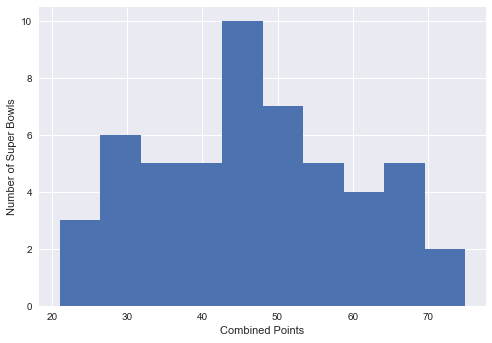

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [4]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

## Point difference distribution
<p>La plupart des points cumulés sont autour de 40-50 points, les extrêmes étant à peu près à égale distance. En filtrant les scores cumulés à 74 et 75, nous retrouvons deux parties avec des performances de quarterback dominantes. L'un d'eux s'est même produit récemment en 2018 dans le Super Bowl LII, où les Patriots de Tom Brady ont perdu face aux outsiders des Eagles de Nick Foles, 41 à 33, pour un score cumulé de 74.</p>
<p>En examinant les scores cumulés les plus bas, nous avons les Super Bowl III and VII, qui comportaient des défenses dominantes. Nous avons également le Super Bowl IX à La Nouvelle-Orléans en 1975, dont le score de 16-6 peut être attribué aux intempéries. Le terrain était lisse à cause de la pluie tombée la nuit et il faisait froid (8 °C ou 46 °F), ce qui rendait difficile toutes velléités offensives pour les Steelers et les Vikings. Ce fut le deuxième Super Bowl le plus froid de l'histoire et le dernier à être joué par mauvais temps en plus de 30 ans. La NFL a réalisé que les gens aiment les points, je suppose.</p>
<p><em>MISE A JOUR: Dans le Super Bowl LIII en 2019, les Patriots et les Rams ont battu le record du Super Bowl avec le score le plus bas et un score cumulé de 16 points (13-3 pour les Patriots).</em></p>
<p>Regardons la colonne <code>difference_pts</code> maintenant.</p>

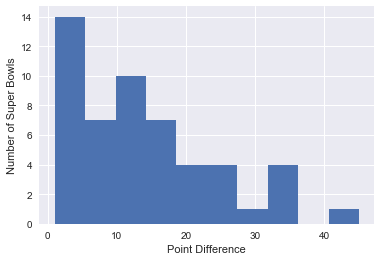

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [5]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls.difference_pts == 1])
display(super_bowls[super_bowls.difference_pts >= 35])

## Les victoires à sens unique se traduisent-elles par une perte de téléspectateurs?
<p>La grandes majorité des Super Bowls sont des matchs avec des scores proches. Logique. Les deux équipes méritent leurs places étant donnés qu'elles ont été aussi loin. Le match le plus serré de tous les temps était celui où les Buffalo Bills avaient perdu d'1 point contre les Giants de New York en 1991, dont le plus beau souvenir fut la tentative manquée de Scott Norwood qui est allé <em><a href="https://www.youtube.com/watch?v=RPFZCGgjDSg">largement à droite</a></em>, ce qui a donné quatre défaites consécutives pour les Bills. Pauvre Scott. La différence la plus importante jamais enregistrée a été de 45 points! Le Hall of Farmer Joe Montana a mené les 49ers de San Francisco à la victoire en 1990, un an avant le match le plus proche de tous les temps.</p>

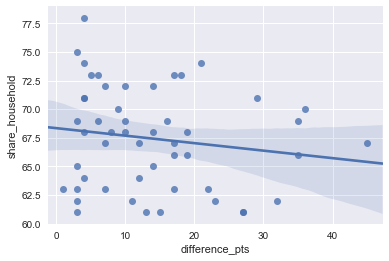

In [6]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x=games_tv.difference_pts, y=games_tv.share_household, data=games_tv)

## Audience et industrie de la publicité au fil du temps
<p>La ligne de régression en pente descendante et l'intervalle de confiance de 95% pour cette régression <em> suggèrent </em> qu'il est courant de perdre du terrain s'il s'agit d'une victoire à sens unique. Bien que cela corresponde à notre intuition, nous devons le prendre avec des pincettes car la relation linéaire dans les données est faible en raison de la taille réduite de notre échantillon de 52 parties.</p>
<p>Peu importe le score, je parie que la plupart des gens patientent pour regarder la spectacle de la mi-temps, ce qui est une bonne nouvelle pour les réseaux de télévision et les annonceurs. Un spot de 30 secondes coûte un joli pactole de <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1">5 million de dollars</a> maintenant, mais cela a-t-il toujours été ainsi? Et comment le nombre de téléspectateurs et les classements des ménages ont-ils évolué parallèlement au coût des annonces? Nous pouvons le savoir en utilisant des tracés linéaires qui partagent un x-axis du "Super Bowl".</p>

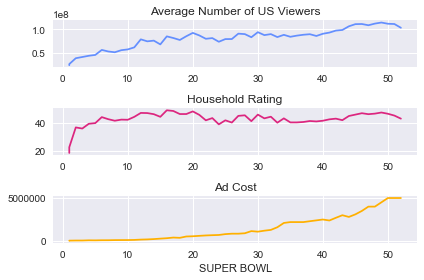

In [7]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## Halftime shows weren't always this great
<p>Nous pouvons voir le nombre de téléspectateurs augmentés avant les coûts publicitaires. Peut-être que les chaines de télévision n'étaient pas très férus de données et étaient lents à réagir?</p>
<p>Une autre hypothèse: peut-être que les spectacles de mi-temps n'étaient pas si bonnes les premières années? Le spectacle moderne du Super Bowl a beaucoup à voir avec le prestige culturel des grands numéros de la mi-temps. Je suis allé sur YouTube et il s'est avéré que les anciens n'étaient pas à la hauteur des normes actuelles. Quelques exemples:</p>
<ul>
<li><a href="https://youtu.be/6wMXHxWO4ns?t=263">Super Bowl XXVI</a> en 1992: Un rap Frosty The Snowman interprété par des enfants.</li>
<li><a href="https://www.youtube.com/watch?v=PKQTL1PYSag">Super Bowl XXIII</a> en 1989: Un imitateur d'Elvis qui a fait des tours de magie et n'a même pas chanté une chanson d'Elvis.</li>
<li><a href="https://youtu.be/oSXMNbK2e98?t=436">Super Bowl XXI</a> en 1987: Des poneys en claquettes. (Ok, c'est vraiment génial.)</li>
</ul>
<p>Il s'avère que la performance du Super Bowl XXVII de Michael Jackson, l'un des événements les plus regardés de l'histoire de la télévision américaine, a été l'occasion pour la NFL de prendre conscience de la valeur du temps d'antenne du Super Bowl et de décider dès lors de signer des grands noms. Les spectacles de la mi-temps avant MJ n’étaient en effet pas si impressionnants, ce que nous pouvons constater en filtrant nos données <code>halftime_musician</code>.</p>

In [8]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## Qui a le plus d'apparitions à la mi-temps?
<p>Beaucoup de fanfares. Pete Fountain, clarinettiste de jazz américain. Miss Texas 1973 jouant du violon. Rien contre ces artistes, ils ne sont tout simplement pas <a href="https://www.youtube.com/watch?v=suIg9kTGBVI">Beyoncé</a>. Pour être personne.</p>
<p>Voyons tous les musiciens qui ont joué plus d'un spectacle à la mi-temps, y compris le nombre de leurs performances.</p>

In [9]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
display(halftime_appearances[halftime_appearances.super_bowl > 1])

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## Qui a joué le plus de chansons dans un spectacle de la mi-temps?
<p>De renommée mondiale, <a href="https://www.youtube.com/watch?v=RL_3oqpHiDg">la Grambling State University Tiger Marching Band </a> remporte la couronne avec six apparitions. Beyoncé, Justin Timberlake, Nelly et Bruno Mars sont les seuls musiciens post-2000 à avoir plusieurs apparitions (deux chacun).</p>
<p>Parmi nos inspections précédentes, la colonne <code>num_songs</code> contient de nombreuses valeurs manquantes:</p>
<ul>
<li>Beaucoup de groupes qui défilent n'ont pas d'entrées <code>num_songs</code>.</li>
<li>Pour les bandes qui ne défilent pas, les données manquantes commencent à apparaître au Super Bowl XX.</li>
</ul>
<p>Filtrons les fanfares avec les mots "Marching" et "Spirit" (une convention de dénomination commune aux fanfares est "Spirit of [quelque chose]"). Ensuite, nous filtrerons les Super Bowl après le Super Bowl XX pour résoudre le problème de données manquantes. <em>Puis</em> voyons qui a le plus grand nombre de chansons.</p>

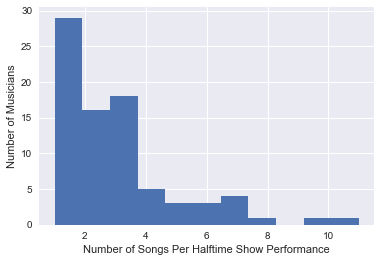

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [10]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

## Conclusion
<p>Ainsi, la plupart des musiciens qui ne font pas partie d'un groupe font 1-3 chansons par spectacle à la mi-temps. Il est important de noter que la durée du spectacle de la mi-temps est fixe (environ 12 minutes), de sorte que le nombre de chansons par performance est davantage une mesure du nombre de chansons jouées. JT est venu en 2018, wow. 11 chansons! Diana Ross arrive en deuxième position avec 10 en 1996.</p>
<p>Dans ce notebook, nous avons chargé, nettoyé, puis exploré les données des matchs, séries et émissions télévisées du Super Bowl. Nous avons visualisé les distributions des points cumulés, des différences de points et des performances des spectacles à la mi-temps à l’aide d’histogrammes. Nous avons utilisé des tracés linéaires pour voir comment le coût des annonces augmentait moins vite que celui de l'audience. Et nous avons découvert que les victoires à sens unique semblent conduire à une baisse du nombre de téléspectateurs.</p>
<p>Qui va gagner le Super Bowl LIII?</p>
<p><em>MISE A JOUR: <a href="https://en.wikipedia.org/wiki/Super_Bowl_LIII">Alert spoiler</a>.</em></p>

In [11]:
# 2018-2019 conference champions
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'

# Who will win Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('The winner of Super Bowl LIII will be the', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the New England Patriots
